In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: zip the folder '/content/drive/MyDrive/Research/X-Ray Imaging'. include only dataset and models folder

!zip -r /content/drive/MyDrive/Research/X-Ray_Imaging_zipped.zip /content/drive/MyDrive/Research/X-Ray\ Imaging/dataset /content/drive/MyDrive/Research/X-Ray\ Imaging/models


  adding: content/drive/MyDrive/Research/X-Ray Imaging/dataset/ (stored 0%)
  adding: content/drive/MyDrive/Research/X-Ray Imaging/dataset/data_entry_chest_with_one_hot.csv (deflated 91%)
  adding: content/drive/MyDrive/Research/X-Ray Imaging/dataset/images/ (stored 0%)
  adding: content/drive/MyDrive/Research/X-Ray Imaging/dataset/images/train_image_names.npy (deflated 94%)
  adding: content/drive/MyDrive/Research/X-Ray Imaging/dataset/images/valid_image_names.npy (deflated 94%)
  adding: content/drive/MyDrive/Research/X-Ray Imaging/dataset/images/train/ (stored 0%)
  adding: content/drive/MyDrive/Research/X-Ray Imaging/dataset/images/train/image_array_train.npy

## visualizing class distributions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/dataset/data_entry_chest_with_one_hot.csv')

# Define the disease labels dictionary
labels_dict = {"Atelectasis": 0, "Cardiomegaly": 1, "Consolidation": 2, "Edema": 3,
               "Effusion": 4, "Emphysema": 5, "Fibrosis": 6, "Hernia": 7,
               "Infiltration": 8, "Mass": 9, "No Finding": 10, "Nodule": 11,
               "Pleural_Thickening": 12, "Pneumonia": 13, "Pneumothorax": 14}

# Create a dictionary to store the counts for each disease
disease_counts = {label: 0 for label in labels_dict.keys()}

# Count the occurrences of each disease using the One-Hot Encoded Labels column
for index, row in data.iterrows():
    one_hot_labels = eval(row['One-Hot Encoded Labels'])  # Convert string to list
    for disease, idx in labels_dict.items():
        disease_counts[disease] += one_hot_labels[idx]

# Sort disease counts in descending order for plotting
sorted_disease_counts = dict(sorted(disease_counts.items(), key=lambda item: item[1], reverse=True))

# Plot the data
plt.figure(figsize=(10, 7))
plt.bar(sorted_disease_counts.keys(), sorted_disease_counts.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Number of Samples for Each Disease')

# Display counts on top of the bars
for i, (disease, count) in enumerate(sorted_disease_counts.items()):
    plt.text(i, count + 100, str(count), ha='center')

plt.tight_layout()
plt.show()


## data processing

In [ ]:
import pandas as pd

In [ ]:
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/X-Ray Imaging/sir_imran_shared_dataset/Train'

# Get the total size of the folder in bytes
# total_size = sum(os.path.getsize(os.path.join(folder_path, f)) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)))

# Convert the size to a human-readable format
def get_size_format(b, factor=1024, suffix="B"):
    """
    Scale bytes to its proper byte format
    e.g:
        1253656 => '1.20MB'
        1253656678 => '1.17GB'
    """
    for unit in ["", "K", "M", "G", "T", "P", "E", "Z"]:
        if b < factor:
            return f"{b:.2f}{unit}{suffix}"
        b /= factor
    return f"{b:.2f}Y{suffix}"

# formatted_size = get_size_format(total_size)

# Print the folder size
# print(f"Total folder size: {formatted_size}")

# Get the total number of files in the folder
# total_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
total_files = len(os.listdir(folder_path))

# Print the total number of files
print(f"\nTotal number of files: {total_files}")


Total number of files: 70517


## creating image_array[train].npy

In [ ]:
# prompt: get all images stored in this folder "/content/drive/MyDrive/X-Ray Imaging/sir_imran_shared_dataset/Test" and stored the result in image_array_test.npy

import numpy as np
from PIL import Image
import os

folder_path_test = '/content/drive/MyDrive/X-Ray Imaging/sir_imran_shared_dataset/Test/Test'
image_array_test = os.listdir(folder_path_test)
print(f"Total number of files: {len(image_array_test)}")

np.save('/content/drive/MyDrive/X-Ray Imaging/dataset/images/test/image_array_test.npy', np.array(image_array_test))

Total number of files: 25596


# Creating labels

### creating labels for all images

In [ ]:
# prompt: load "/content/drive/MyDrive/X-Ray Imaging/data_entry_chest.csv".
# In 2nd column there  finding labels which is baiscally not one label but multiple labels concatendated by pipe ( | ) symbol.. these labels actually represent diseases a particular patient has given a particular patient image respresented by image index in 1st column.. now your job is to create one hot encoding of labels

import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/X-Ray Imaging/data_entry_chest.csv')

# Extract the finding labels and split them by '|'
labels = data['Finding Labels'].str.split('|').tolist()

# Create a set of unique labels
unique_labels = set()
for label_list in labels:
  for label in label_list:
    unique_labels.add(label)

# Create a dictionary to map labels to one-hot encoded vectors
label_to_index = {label: i for i, label in enumerate(sorted(list(unique_labels)))}

# Create a list to store the one-hot encoded vectors
one_hot_encoded_labels = []

# Iterate over the labels and create one-hot encoded vectors
for label_list in labels:
  one_hot_vector = [0] * len(unique_labels)
  for label in label_list:
    one_hot_vector[label_to_index[label]] = 1
  one_hot_encoded_labels.append(one_hot_vector)

# Create a new DataFrame with the one-hot encoded labels
data['One-Hot Encoded Labels'] = one_hot_encoded_labels



### creating labels of [train].npy

In [ ]:
# prompt: load 'data_entry_chest_with_one_hot.csv' and also load image_array_val.npy... for each image in image_array_val.npy loads its one-hot encoding from dataframe and store it in array. finally store the array in label_array_val.npy

import numpy as np

# Load the image array
image_array_val = np.load('/content/drive/MyDrive/X-Ray Imaging/dataset/images/test/image_array_test.npy')

# Load the CSV file with one-hot encoded labels
data = pd.read_csv('/content/drive/MyDrive/X-Ray Imaging/dataset/data_entry_chest_with_one_hot.csv')

# Create an empty list to store the labels for the validation set
label_array_val = []
print(f"len of image_array_val : {len(image_array_val)}")
# Iterate through the image array
for image_name in image_array_val:

  # Find the row in the DataFrame that matches the image file name
  row = data.loc[data['Image Index'] == image_name]

  # Extract the one-hot encoded label from the row
  if not row.empty:
      one_hot_label = row['One-Hot Encoded Labels'].values[0]
      print(f"Image file name: {image_name}")
      print(f"One-hot encoded label: {one_hot_label} type:{type(one_hot_label)}")

      # Convert the string representation of the list into a list of integers
      one_hot_label = [int(x) for x in one_hot_label[1:-1].split(', ')]

      print(f"after one-hot : {one_hot_label} type:{type(one_hot_label)}")
      # Append the one-hot label to the list
      label_array_val.append(one_hot_label)

  else:
      print(f"Image file name {image_name} not found in the CSV.")
      label_array_val.append([0] * len(label_to_index))  # Or any other default value

# Convert the list of labels to a NumPy array
label_array_val = np.array(label_array_val)

# Save the label array to a file
np.save('/content/drive/MyDrive/X-Ray Imaging/dataset/labels/test/label_array_test.npy', label_array_val)

Streaming output truncated to the last 5000 lines.
One-hot encoded label: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'str'>
after one-hot : [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'list'>
Image file name: 00009218_008.png
One-hot encoded label: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'str'>
after one-hot : [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'list'>
Image file name: 00009218_025.png
One-hot encoded label: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'str'>
after one-hot : [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'list'>
Image file name: 00009218_032.png
One-hot encoded label: [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'str'>
after one-hot : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] type:<class 'list'>
Image file name: 00009218_015.png
One-hot encoded label: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] type:<class 'str'>
after one-hot : [0, 0, 0, 0, 1, 0, 0, 0, 0, 0

In [ ]:
# prompt: load trian and valid_label npy file and print its shape

train_label = np.load('/content/drive/MyDrive/X-Ray Imaging/label_array_train.npy')
valid_label = np.load('/content/drive/MyDrive/X-Ray Imaging/label_array_val.npy')

print("Train label shape:", train_label.shape)
print("Valid label shape:", valid_label.shape)

Train label shape: (70517, 15)
Valid label shape: (16007, 15)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  One-Hot Encoded Labels       112120 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 10.3+ MB


In [ ]:
type(data[data["Image Index"] == "00004850_003.png"]['One-Hot Encoded Labels'].values[0])

str

## processing-images

In [ ]:
# # prompt: create a zero initialzed numpy array of shape (25596, 224,224,3) and store it in /content/drive/MyDrive/X-Ray Imaging/dataset/images/test/image_array_test.npy

# import numpy as np

# image_array_test = np.zeros((25596, 224, 224, 3), dtype=np.uint8)
# np.save('/content/drive/MyDrive/X-Ray Imaging/dataset/images/test/image_array_test.npy', image_array_test)

In [ ]:
# # prompt: load image_array_val.npy which contains image names... use base folder '/content/drive/MyDrive/X-Ray Imaging' and load each image.
# # for each image :
# #    load using opencv and convert to RGB
# #    Image Resize: 224*224
# #    Image conversion into numpy arrays
# # finally that is stored back into image_array_val_images.npy but it should be mmaped for effiecnt purposes as I can't load all images in memory

# import numpy as np
# import cv2
# import os
# from google.colab import drive


# def load_and_preprocess_images(image_array_path, base_folder, output_path, startIdx=0, endIdx=None):
#   image_names = np.load(image_array_path, mmap_mode='r')
#   image_shape = (224, 224, 3)
#   images_len = len(image_names)
#   array_shape = (images_len, *image_shape)
#   print(f"shape : ({images_len} , 224, 224, 3)")

#   image_data = np.load(output_path , mmap_mode='r+')

#   # # Check if the file exists
#   # if os.path.exists(output_path):
#   #     # If file exists, use 'r+' mode to open it for reading and writing

#   #     # image_data = np.memmap(output_path, dtype='uint8', mode='r+', shape=array_shape)
#   #     print("Using existing file.")
#   # else:
#   #     # If file doesn't exist, use 'w+' mode to create a new file
#   #     # image_data = np.memmap(output_path, dtype='uint8', mode='w+', shape=array_shape)
#   #     print("Creating new file.")

#   # for i in range(len(image_names)):
#   #   print(f"index : {i}")
#   #   image_data[i] = np.zeros((224, 224, 3), dtype=np.uint8)

#   print(f"starting loop from startIdx : {startIdx} till endIdx:{endIdx} (exclusive)")
#   for i, image_name in enumerate(image_names):
#     if i < startIdx :
#       continue
#     if endIdx is not None and i >= endIdx:
#       break

#     print(f"Index : {i}")
#     image_path = os.path.join(base_folder, image_name)
#     try:
#       image = cv2.imread(image_path)
#       if image is not None:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, (224, 224))
#         image_data[i] = image
#     except Exception as e:
#       print(f"Error processing image {image_name}: {e}")
#       # You can choose to handle the error by skipping the image or doing something else

#     if i%100 == 0:
#       print(f"[Force] Flushing data to storage")
#       image_data.flush()

#   print(f"[End] Flushing ...")
#   image_data.flush()

#   # np.save(output_path, image_data)

#   return image_data

# image_array_path = '/content/drive/MyDrive/X-Ray Imaging/image_array_train.npy'
# base_folder = '/content/drive/MyDrive/X-Ray Imaging/sir_imran_shared_dataset/Train'
# # output_path = '/content/drive/MyDrive/X-Ray Imaging/image_array_train_images.npy'
# output_path = '/content/drive/MyDrive/X-Ray Imaging/image_np_array_train_images.npy'

# image_data = load_and_preprocess_images(image_array_path, base_folder, output_path, 61700, 66201 )



In [ ]:
# prompt: in above cell I'm processing images as you know but it's very slow.. can't I use threading to speed up this process

from google.colab import drive
import pandas as pd
import numpy as np
import os
import cv2
import threading

# drive.mount('/content/drive')

# ... (Your existing code for loading data, labels, etc.) ...

def load_and_preprocess_images_thread(image_names, base_folder, output_path, startIdx, endIdx, image_data):
  for i, image_name in enumerate(image_names):
    if i < startIdx:
      continue
    if endIdx is not None and i >= endIdx:
      break

    print(f"[Thread {threading.current_thread().name}] index : {i}")

    image_path = os.path.join(base_folder, image_name)
    try:
      image = cv2.imread(image_path)
      if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image_data[i] = image
    except Exception as e:
      print(f"Error processing image {image_name}: {e}")

    if i % 100 == 0:
      print(f"[Thread {threading.current_thread().name}] Flushing data to storage where index : {i}")
      image_data.flush()


def load_and_preprocess_images(image_array_path, base_folder, output_path, startIdx=0, endIdx=None, num_threads=4):
  image_names = np.load(image_array_path, mmap_mode='r')
  image_shape = (224, 224, 3)
  images_len = len(image_names)
  array_shape = (images_len, *image_shape)
  print(f"shape : ({images_len} , 224, 224, 3)")

  image_data = np.load(output_path , mmap_mode='r+')

  if endIdx is None:
    endIdx = images_len

  chunk_size = (endIdx - startIdx) // num_threads
  threads = []
  for i in range(num_threads):

    start_idx = startIdx + (i * chunk_size)
    end_idx = startIdx + ((i + 1) * chunk_size) if i < num_threads - 1 else endIdx

    print(f"Creating thread [{i}] for index : {start_idx} to {end_idx}")
    thread = threading.Thread(target=load_and_preprocess_images_thread, args=(image_names, base_folder, output_path, start_idx, end_idx, image_data))
    threads.append(thread)
    thread.start()

  for thread in threads:
    thread.join()

  print(f"[End] Flushing ...")
  image_data.flush()
  return image_data

image_array_path = '/content/drive/MyDrive/X-Ray Imaging/dataset/images/test_image_names.npy'
base_folder = '/content/drive/MyDrive/X-Ray Imaging/sir_imran_shared_dataset/Test/Test'
output_path = '/content/drive/MyDrive/X-Ray Imaging/dataset/images/test/image_array_test.npy'

image_data = load_and_preprocess_images(image_array_path, base_folder, output_path, 20001)

Streaming output truncated to the last 5000 lines.
[Thread Thread-26 (load_and_preprocess_images_thread)] index : 24359
[Thread Thread-24 (load_and_preprocess_images_thread)] index : 21560
[Thread Thread-23 (load_and_preprocess_images_thread)] index : 20162
[Thread Thread-25 (load_and_preprocess_images_thread)] index : 22955
[Thread Thread-26 (load_and_preprocess_images_thread)] index : 24360
[Thread Thread-23 (load_and_preprocess_images_thread)] index : 20163
[Thread Thread-24 (load_and_preprocess_images_thread)] index : 21561
[Thread Thread-25 (load_and_preprocess_images_thread)] index : 22956
[Thread Thread-26 (load_and_preprocess_images_thread)] index : 24361
[Thread Thread-23 (load_and_preprocess_images_thread)] index : 20164
[Thread Thread-24 (load_and_preprocess_images_thread)] index : 21562
[Thread Thread-25 (load_and_preprocess_images_thread)] index : 22957
[Thread Thread-26 (load_and_preprocess_images_thread)] index : 24362
[Thread Thread-24 (load_and_preprocess_images_thread

In [ ]:
# # Example usage:
# image_array_path = '/content/drive/MyDrive/X-Ray Imaging/image_array_val.npy'
# base_folder = '/content/drive/MyDrive/X-Ray Imaging/sir_imran_shared_dataset/Val'
# output_path = '/content/drive/MyDrive/X-Ray Imaging/image_array_val_images.npy'

# image_data = load_and_preprocess_images(image_array_path, base_folder, output_path)

shape : (16007 , 224, 224, 3)


In [ ]:
# image_array_path = '/content/drive/MyDrive/X-Ray Imaging/image_array_train.npy'
# base_folder = '/content/drive/MyDrive/X-Ray Imaging/sir_imran_shared_dataset/Train'
# output_path = '/content/drive/MyDrive/X-Ray Imaging/image_array_train_images.npy'

# image_data = load_and_preprocess_images(image_array_path, base_folder, output_path)

shape : (70517 , 224, 224, 3)
starting loop
Index : 0


### code to load images

(70517, 224, 224, 3)


memmap([[[ 13,  13,  13],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  6,   6,   6],
         [ 12,  12,  12],
         [ 26,  26,  26]],

        [[ 12,  12,  12],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4]],

        [[ 12,  12,  12],
         [  4,   4,   4],
         [  4,   4,   4],
         ...,
         [  3,   3,   3],
         [  4,   4,   4],
         [  4,   4,   4]],

        ...,

        [[ 94,  94,  94],
         [ 79,  79,  79],
         [ 74,  74,  74],
         ...,
         [123, 123, 123],
         [183, 183, 183],
         [235, 235, 235]],

        [[106, 106, 106],
         [ 94,  94,  94],
         [ 87,  87,  87],
         ...,
         [130, 130, 130],
         [188, 188, 188],
         [238, 238, 238]],

        [[120, 120, 120],
         [114, 114, 114],
         [107, 107, 107],
         ...,
         [133, 133, 133],
         [188, 188, 188],
         [240, 240, 240]]], dtype=uint8)
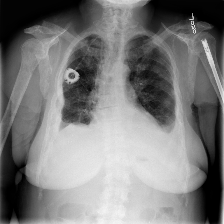

In [ ]:
# prompt: load image_array_train_images.npy and access it 41000 index image display it as array

import numpy as np

# Load the .npy file containing the image data
train_images = np.memmap('/content/drive/MyDrive/X-Ray Imaging/image_array_train_images.npy', mode='r', dtype='uint8', shape=(70517 , 224, 224, 3))

print(train_images.shape)

# Access the image at index 41000
image_at_index_41000 = train_images[60001]

# Display the image as a NumPy array
image_at_index_41000

(1, 224, 224, 3)

## verify black images

In [ ]:
## verify images are not zero
import numpy as np

def check_black_images(images, startIdx=0, endIdx=None):
    # List to store indices of fully black images
    black_image_indices = []

    # Loop over each image and check if it's fully black
    for i, img in enumerate(images):
        if i < startIdx :
          continue
        if endIdx is not None and i >= endIdx:
          break
        print(f"index : {i} ")
        if np.all(img == 0):  # Check if all pixels in the image are zero
            black_image_indices.append(i)

    return black_image_indices

# train_images = np.memmap('/content/drive/MyDrive/X-Ray Imaging/image_array_train_images.npy', mode='r', dtype='uint8', shape=(70517 , 224, 224, 3))
# train_images = np.memmap('/content/drive/MyDrive/X-Ray Imaging/image_array_train_images_45001_60000.npy', mode='r', dtype='uint8', shape=(70517 , 224, 224, 3))
# train_images = np.memmap('/content/drive/MyDrive/X-Ray Imaging/image_array_train_images_60001.npy', mode='r', dtype='uint8', shape=(70517 , 224, 224, 3))
# train_images = np.memmap('/content/drive/MyDrive/X-Ray Imaging/Copy of image_array_val_images.npy', mode='r', dtype='uint8', shape=(16007 , 224, 224, 3))
# train_images = np.memmap('/content/drive/MyDrive/X-Ray Imaging/Copy of image_array_train_images_45001_60000_only.npy', mode='r', dtype='uint8', shape=(15000 , 224, 224, 3))
train_images = np.load('/content/drive/MyDrive/X-Ray Imaging/dataset/images/test/image_array_test.npy' , mmap_mode='r')

# Example usage:
black_images = check_black_images(train_images)

# Now black_images will contain the indices of images that are fully black (all zero)
if black_images:
    print(f"Found {len(black_images)} fully black images at indices: {black_images}")
else:
    print("No fully black images found.")

Streaming output truncated to the last 5000 lines.
index : 20597 
index : 20598 
index : 20599 
index : 20600 
index : 20601 
index : 20602 
index : 20603 
index : 20604 
index : 20605 
index : 20606 
index : 20607 
index : 20608 
index : 20609 
index : 20610 
index : 20611 
index : 20612 
index : 20613 
index : 20614 
index : 20615 
index : 20616 
index : 20617 
index : 20618 
index : 20619 
index : 20620 
index : 20621 
index : 20622 
index : 20623 
index : 20624 
index : 20625 
index : 20626 
index : 20627 
index : 20628 
index : 20629 
index : 20630 
index : 20631 
index : 20632 
index : 20633 
index : 20634 
index : 20635 
index : 20636 
index : 20637 
index : 20638 
index : 20639 
index : 20640 
index : 20641 
index : 20642 
index : 20643 
index : 20644 
index : 20645 
index : 20646 
index : 20647 
index : 20648 
index : 20649 
index : 20650 
index : 20651 
index : 20652 
index : 20653 
index : 20654 
index : 20655 
index : 20656 
index : 20657 
index : 20658 
index : 20659 
inde

In [ ]:
# # Load the memory-mapped array using np.load
# loaded_mmap = np.load(filename, mmap_mode='r')

# # Access elements of the array as needed
# print(loaded_mmap[0])  # access the first element


## code to merge two arrays

In [ ]:
# import numpy as np

# train_images = np.memmap('/content/drive/MyDrive/X-Ray Imaging/image_array_train_images.npy', mode='r+', dtype='uint8', shape=(70517 , 224, 224, 3))
# train_images_45001_60001 = np.memmap('/content/drive/MyDrive/X-Ray Imaging/image_array_train_images_60001.npy', mode='r', dtype='uint8', shape=(70517 , 224, 224, 3))

# for i in range(60001, 60801):
#   print(f"Index : {i}")
#   train_images[i] = train_images_45001_60001[i]

# for i in range(60801, 70517):
#   print(f"Index : {i}")
#   train_images[i] = train_images_45001_60001[i]

# train_images.flush()

In [ ]:
# import numpy as np

# # prompt: copy data from 'np.memmap('/content/drive/MyDrive/X-Ray Imaging/image_array_train_images.npy', mode='r+', dtype='uint8', shape=(70517 , 224, 224, 3)) '
# # to 'np.load /content/drive/MyDrive/X-Ray Imaging/image_np_array_train_images.npy'

# train_images_source = np.memmap('/content/drive/MyDrive/X-Ray Imaging/dataset/images/val/image_array_val.npy', mode='r', dtype='uint8', shape=(16007 , 224, 224, 3))
# train_images_destination = np.load('/content/drive/MyDrive/X-Ray Imaging/dataset/images/val/np_image_array_val.npy', mmap_mode='r+')
# # train_images_destination = np.zeros((16007 , 224, 224, 3), dtype=np.uint8)
# # train_images_destination = np.empty((70517, 224, 224, 3), dtype=np.uint8)

# # Assuming both arrays have the same shape
# for i in range(train_images_source.shape[0]):
#   print(f"index : {i}")
#   train_images_destination[i] = train_images_source[i]

# train_images_destination.flush()

# # np.save('/content/drive/MyDrive/X-Ray Imaging/dataset/images/val/np_image_array_val.npy', train_images_destination)

#Loading arrays

In [ ]:
# Define the paths where your arrays are saved

#Training array path
image_array_path1 = '/content/drive/MyDrive/X-Ray Imaging/dataset/images/train/image_array_train.npy'
label_array_path1 = '/content/drive/MyDrive/X-Ray Imaging/dataset/labels/train/label_array_train.npy'

#Validation array path
image_array_path2 = '/content/drive/MyDrive/X-Ray Imaging/dataset/images/val/image_array_val.npy'
label_array_path2 = '/content/drive/MyDrive/X-Ray Imaging/dataset/labels/val/label_array_val.npy'

In [ ]:
import numpy as np

#Loading train data
image_array_train = np.load(image_array_path1, mmap_mode='r')
label_array_train = np.load(label_array_path1, mmap_mode='r')

#Loading val data
image_array_val = np.load(image_array_path2, mmap_mode='r')
label_array_val = np.load(label_array_path2, mmap_mode='r')

In [ ]:
# print shapes
print(image_array_train.shape)
print(label_array_train.shape)

print(image_array_val.shape)
print(label_array_val.shape)

(70517, 224, 224, 3)
(70517, 15)
(16007, 224, 224, 3)
(16007, 15)


#Creating data generator

In [ ]:
#code that correctly works with shuffle

import numpy as np
from tensorflow.keras.utils import Sequence

class MemMappedDataGenerator(Sequence):
    def __init__(self, image_paths, label_array, batch_size, train=True):
        self.image_paths = image_paths
        self.label_array = label_array
        self.batch_size = batch_size
        self.train = train
        self.indices = np.arange(len(self.image_paths))

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x = [self.image_paths[i] for i in batch_indices]
        batch_y = [self.label_array[i] for i in batch_indices]
        return np.array(batch_x), np.array(batch_y)

    def on_epoch_end(self):
        if self.train:
            np.random.shuffle(self.indices)

# Create generators using the memory-mapped arrays
train_gen = MemMappedDataGenerator(image_array_train, label_array_train, batch_size=32, train=True)
val_gen = MemMappedDataGenerator(image_array_val, label_array_val, batch_size=16, train=False)

#Model training

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.applications import ResNet101V2

# Load the pre-trained ResNet101V2 model
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = True

# Add custom layers for multi-label classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(15, activation='sigmoid')(x)  # 15 classes for multi-label classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy','AUC'])

filepath = "/content/drive/MyDrive/X-Ray Imaging/models/ResNet101V2_100epoch.keras"

# Model Checkpoint to save the best model
model_checkpoint = ModelCheckpoint(
    filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Define the learning rate schedule function
def lr_schedule(epoch):
    if epoch < 60:
        return 0.0005
    elif 60 <= epoch < 80:
        return 0.00005
    elif 80 <= epoch < 90:
        return 0.00003
    else:
        return 0.00001

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)


# Model summary
model.summary()

171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 43,683,343 (166.64 MB)

 Trainable params: 43,585,679 (166.27 MB)

 Non-trainable params: 97,664 (381.50 KB)

In [ ]:
# prompt: above is the code to create model for first time... but for later I want to load model instead of creatig new model

from tensorflow.keras.models import load_model

try:
  model = load_model("/content/drive/MyDrive/X-Ray Imaging/models/ResNet101V2.keras")
  print("Loaded existing model.")
except:
  print("No existing model found. Continuing with model creation.")
  # ... your existing model creation code ...

Loaded existing model.


In [ ]:
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt

# Train the model using the dataset
history = model.fit(train_gen, epochs=100, validation_data=val_gen, callbacks=[model_checkpoint, lr_scheduler])
# history = model.fit(train_gen, epochs=100,  callbacks=[model_checkpoint, lr_scheduler])

save_model(model, '/content/drive/MyDrive/X-Ray Imaging/models/ResNet101V2_100epoch.keras')



Epoch 1: LearningRateScheduler setting learning rate to 0.0005.
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2204/2204 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - AUC: 0.8350 - accuracy: 0.5314 - loss: 0.2154
Epoch 1: val_loss improved from inf to 0.20217, saving model to /content/drive/MyDrive/ResNet101V2.keras
2204/2204 ━━━━━━━━━━━━━━━━━━━━ 1298s 531ms/step - AUC: 0.8350 - accuracy: 0.5314 - loss: 0.2154 - val_AUC: 0.8303 - val_accuracy: 0.6544 - val_loss: 0.2022 - learning_rate: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005.
Epoch 2/100
2204/2204 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - AUC: 0.8780 - accuracy: 0.5558 - loss: 0.1888
Epoch 2: val_loss improved from 0.20217 to 0.17205, saving model to /content/drive/MyDrive/ResNet101V2.keras
2204/2204 ━━━━━━━━━━━━━━━━━━━━ 1023s 463ms/step - AUC: 0.8780 - accuracy: 0.5558 - loss: 0.1888 - val_AUC: 0.8906 - val_accuracy: 0.6295 - val_loss: 0.1721 - learning_rate: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005.
Epoch 3/100
2204/2204 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - AUC: 0.8918 - accuracy: 0.5634 

### model predictions

In [ ]:
# prompt: get y_pred suing val_gen

y_pred = model.predict(val_gen)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1001/1001 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step


In [ ]:
y_true = label_array_val

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Assuming y_true contains the one-hot encoded true labels (shape: [n_samples, n_classes])
# and y_pred contains the sigmoid outputs (shape: [n_samples, n_classes])

# Threshold the sigmoid outputs to obtain binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# Define the label mapping
label_mapping = {
    0: "Atelectasis",
    1: "Cardiomegaly",
    2: "Consolidation",
    3: "Edema",
    4: "Effusion",
    5: "Emphysema",
    6: "Fibrosis",
    7: "Hernia",
    8: "Infiltration",
    9: "Mass",
    10: "No Finding",  # This will be ignored in the final report
    11: "Nodule",
    12: "Pleural_Thickening",
    13: "Pneumonia",
    14: "Pneumothorax"
}

# Overall Accuracy (average accuracy per sample)
sample_accuracy = round(accuracy_score(y_true, y_pred_binary, normalize=True) * 100, 3)

# AUC per class (one-vs-rest for each class)
auc_scores = roc_auc_score(y_true, y_pred, average=None)

# Initialize lists to store per-class metrics
accuracies = []
recalls = []
tnrs = []
fprs = []
fnrs = []

# Calculate per-class metrics
for i in range(y_true.shape[1]):
    # Skip "No Finding" class (index 10)
    if i == 10:
        continue

    # True Positives, False Positives, True Negatives, False Negatives
    tn, fp, fn, tp = confusion_matrix(y_true[:, i], y_pred_binary[:, i]).ravel()

    # Accuracy for the current class
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 3)
    accuracies.append(accuracy)

    # Recall (Sensitivity/TPR) for the current class
    recall = round(tp / (tp + fn), 3) if (tp + fn) != 0 else 0.0
    recalls.append(recall)

    # True Negative Rate (TNR) or Specificity
    tnr = round(tn / (tn + fp), 3) if (tn + fp) != 0 else 0.0
    tnrs.append(tnr)

    # False Positive Rate (FPR)
    fpr = round(fp / (fp + tn), 3) if (fp + tn) != 0 else 0.0
    fprs.append(fpr)

    # False Negative Rate (FNR)
    fnr = round(fn / (fn + tp), 3) if (fn + tp) != 0 else 0.0
    fnrs.append(fnr)

# Exclude AUC for "No Finding" and get disease names for classes other than "No Finding"
auc_scores_filtered = [round(auc_scores[i], 3) for i in range(y_true.shape[1]) if i != 10]
classes_filtered = [label_mapping[i] for i in range(y_true.shape[1]) if i != 10]

# Combine all metrics into a DataFrame for easier display
report_df = pd.DataFrame({
    'Class': classes_filtered,
    'Accuracy': accuracies,
    'AUC': auc_scores_filtered,
    'Recall': recalls,
    'TNR': tnrs,
    'FPR': fprs,
    'FNR': fnrs
})

print("Sample-wise Accuracy:", sample_accuracy)
print(report_df)


Sample-wise Accuracy: 59.205
                 Class  Accuracy    AUC  Recall    TNR    FPR    FNR
0          Atelectasis    92.247  0.758   0.000  1.000  0.000  1.000
1         Cardiomegaly    98.095  0.880   0.000  1.000  0.000  1.000
2        Consolidation    95.746  0.784   0.000  1.000  0.000  1.000
3                Edema    98.613  0.852   0.000  1.000  0.000  1.000
4             Effusion    92.378  0.846   0.177  0.989  0.011  0.823
5            Emphysema    98.513  0.666   0.000  1.000  0.000  1.000
6             Fibrosis    98.769  0.710   0.000  1.000  0.000  1.000
7               Hernia    99.925  0.798   0.000  1.000  0.000  1.000
8         Infiltration    90.061  0.700   0.000  1.000  0.000  1.000
9                 Mass    95.121  0.698   0.000  1.000  0.000  1.000
10              Nodule    94.684  0.593   0.000  1.000  0.000  1.000
11  Pleural_Thickening    97.245  0.697   0.000  1.000  0.000  1.000
12           Pneumonia    99.125  0.653   0.000  1.000  0.000  1.000
13   

In [ ]:
report_df.to_csv('/content/drive/MyDrive/X-Ray Imaging/models/ResNet101V2/classification_report.csv', index=False)